Librerías


In [2]:
#Importamos la librería para leer el fichero con los datos de conexión a la base de datos:
import os
from dotenv import load_dotenv

#Importamos las librerías necesarias para manejar los datos y crear las gráficas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos las librerías necesarias para la conexión con la base de datos:

import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

In [3]:
diractual = os.getcwd()
diractual

'/Users/Edicion/Documents/Estudios/ProjecteIT/ProjecteData/Equip_G/Scripts'

De Limpieza.ipynb exporto el dataframe en un CSV, que importo a continuación para trabajar aquí con el mismo dataframe.

Esta celda y la siguiente se pueden eliminar en caso de fusionarla con otros scripts

In [ ]:
df = pd.read_csv(r'../Results/df_apartamentos.csv')

In [ ]:
df.head()

,Unnamed: 0,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities
0,4067,18263766,Apartamento 1a linea mar con parquing,"Apartamento de 90 m2, primera l�nea de mar, en...",126077779,Castell-Platja d'Aro,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,90.0,FALSO,101.0,spain,girona,2021-02-27,"Elevator, hot water, Washer, beachfront, Long ..."
1,5294,21577762,Rustic Chic Studio Downtown (C80),Welcome to our brand new apartment in the cent...,5890675,Centro,NaN,Entire home/apt,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,245.0,spain,malaga,2021-02-27,"Essentials, Smart lock, nespresso machine, toa..."
2,461,1584877,Sea view penthouse in Calan Porter,Lovely and cozy sea view penthouse in the resi...,8443770,Alaior,NaN,Entire home/apt,4,1.0,...,90.0,100.0,90.0,90.0,VERDADERO,55.0,spain,menorca,2021-02-27,"Outlet covers, hot water, beachfront, Long ter..."
3,5637,22626728,Atic Colera,"Atico con mucha mucha luz, con 2 terrazas exte...",166569559,Colera,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,100.0,FALSO,31.0,spain,girona,2021-02-27,"Elevator, Host greets you, Washer, Long term s..."
4,5078,20854917,Estudio para 2 personas zona Arenal,Este estudio de 25 m2 presenta una decoraci�n ...,137959507,Arenal,Casco Antiguo,Hotel room,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,4.0,spain,sevilla,2021-02-27,"Elevator, Washer, Long term stays allowed, hot..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6733 non-null   int64  
 1   apartment_id                 6733 non-null   int64  
 2   name                         6730 non-null   object 
 3   description                  6706 non-null   object 
 4   host_id                      6733 non-null   int64  
 5   neighbourhood_name           6733 non-null   object 
 6   neighbourhood_district       4075 non-null   object 
 7   room_type                    6733 non-null   object 
 8   accommodates                 6733 non-null   int64  
 9   bathrooms                    6702 non-null   float64
 10  bedrooms                     6704 non-null   float64
 11  beds                         6730 non-null   float64
 12  amenities_list               6717 non-null   object 
 13  price             

In [ ]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

,apartment_id,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
count,6.733000e+03,5530,5529,5459.000000,5450.000000,5456.000000,5445.000000,5454.000000,5444.000000,5444.000000,5530.000000,6733
unique,NaN,1793,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,2018-04-01,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,barcelona
freq,NaN,26,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2041
mean,1.512717e+07,NaN,NaN,919.994504,94.543119,93.150660,96.277319,96.433810,95.293902,91.432770,122.616817,NaN
std,7.729288e+06,NaN,NaN,85.864752,9.098797,9.759154,8.011762,7.659755,7.322268,9.347875,152.254374,NaN
min,1.196400e+04,NaN,NaN,200.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,NaN
25%,8.699662e+06,NaN,NaN,890.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,17.000000,NaN
50%,1.677280e+07,NaN,NaN,940.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,57.000000,NaN
75%,2.148062e+07,NaN,NaN,980.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,176.000000,NaN


In [ ]:
# Imputar fecha de inserción del registro para los casos en que hay reseñas y la last_review_date es nula:

df.loc[df['last_review_date'].isna() & df['first_review_date'].notna(), 'last_review_date'] = df['insert_date']

In [ ]:
df

,Unnamed: 0,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities
0,4067,18263766,Apartamento 1a linea mar con parquing,"Apartamento de 90 m2, primera l�nea de mar, en...",126077779,Castell-Platja d'Aro,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,90.0,FALSO,101.0,spain,girona,2021-02-27,"Elevator, hot water, Washer, beachfront, Long ..."
1,5294,21577762,Rustic Chic Studio Downtown (C80),Welcome to our brand new apartment in the cent...,5890675,Centro,NaN,Entire home/apt,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,245.0,spain,malaga,2021-02-27,"Essentials, Smart lock, nespresso machine, toa..."
2,461,1584877,Sea view penthouse in Calan Porter,Lovely and cozy sea view penthouse in the resi...,8443770,Alaior,NaN,Entire home/apt,4,1.0,...,90.0,100.0,90.0,90.0,VERDADERO,55.0,spain,menorca,2021-02-27,"Outlet covers, hot water, beachfront, Long ter..."
3,5637,22626728,Atic Colera,"Atico con mucha mucha luz, con 2 terrazas exte...",166569559,Colera,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,100.0,FALSO,31.0,spain,girona,2021-02-27,"Elevator, Host greets you, Washer, Long term s..."
4,5078,20854917,Estudio para 2 personas zona Arenal,Este estudio de 25 m2 presenta una decoraci�n ...,137959507,Arenal,Casco Antiguo,Hotel room,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,4.0,spain,sevilla,2021-02-27,"Elevator, Washer, Long term stays allowed, hot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,2273,12265320,"Vila Olimp,Strandblick,Privatzimmer",Grosse&helle Wohnung. 2 private Zimmer (4 Pers...,13561936,la Vila Ol�mpica del Poblenou,Sant Mart�,Private room,2,2.0,...,100.0,100.0,100.0,100.0,FALSO,272.0,spain,barcelona,2017-01-04,"hangers, Hair dryer, Washer, translation missi..."
6729,880,3771149,"Central, double/twin, private bath","Classical-Style apartment, in the centre of Ba...",19327835,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,3.0,...,90.0,90.0,90.0,90.0,FALSO,228.0,spain,barcelona,2017-01-04,"Breakfast, Essentials, hangers, Hair dryer, Wa..."
6730,895,3810717,Amazing flat in the very center,"Modern, beautiful and renewed flat at Born. Ve...",19587234,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Entire home/apt,2,1.0,...,100.0,100.0,100.0,100.0,FALSO,33.0,spain,barcelona,2017-01-04,"Essentials, Washer, translation missing: en.ho..."
6731,902,3847290,Banyoles,Amplia habitaci�n exterior muy luminosa co...,19681580,el Barri G�tic,Ciutat Vella,Private room,2,1.0,...,100.0,100.0,100.0,100.0,FALSO,2.0,spain,barcelona,2017-01-04,"Essentials, Family/kid friendly, Smoke detecto..."


Text(0.5, 0, 'N.º de reseñas')

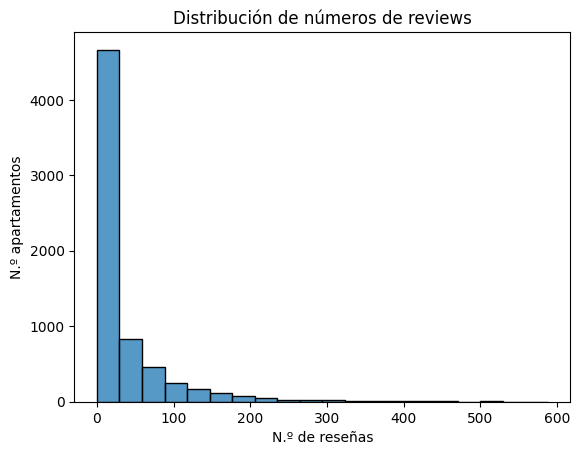

In [ ]:
ax = sns.histplot(data=df, x='number_of_reviews', bins=20)
ax.set_title("Distribución de números de reviews")
ax.set_ylabel("N.º apartamentos")
ax.set_xlabel("N.º de reseñas")

Text(0.5, 0.98, 'Kde de distribución de reviews')

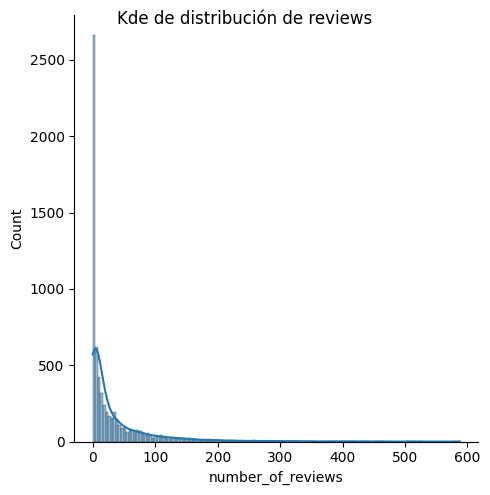

In [ ]:
ax = sns.displot(data=df, x='number_of_reviews', kde=True)
ax.figure.suptitle("Kde de distribución de reviews")

Text(0.5, 1.0, 'Distribución estadística del rating total por ciudad')

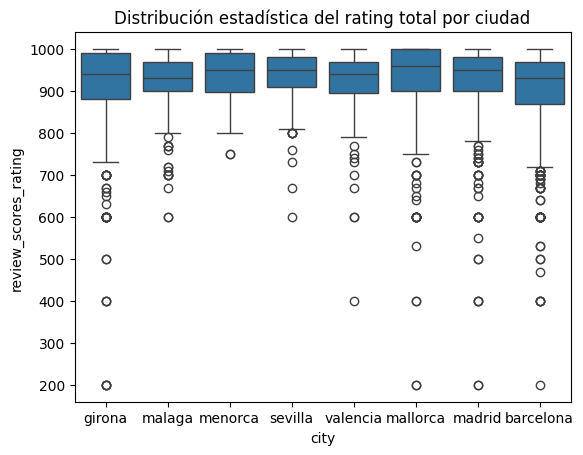

In [ ]:
ax = sns.boxplot(data=df, x='city', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por ciudad")